# **데이터프레임 결합**


## **1.환경준비**

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 가져오기

In [2]:
sales = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_sales_simple.csv")

sales1 = sales.loc[sales['Store_ID']==1]
sales2 = sales.loc[sales['Store_ID']==2]
sales5 = sales.loc[sales['Store_ID']==5]
sales11 = sales.loc[sales['Store_ID']==11]

products = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_product_master.csv")
stores = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_store_master.csv")

In [3]:
sales1.head()

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.0,3
1,5,2013-01-01,1,0.0,5
2,7,2013-01-01,1,0.0,7
3,8,2013-01-01,1,0.0,8
4,10,2013-01-01,1,0.0,10


In [4]:
products.head()

,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
0,20,HG001,Gardening Tools,Household Goods,2,50
1,27,HH001,Home Appliances,Household Goods,2,150
2,16,HK001,Kitchen,Household Goods,2,23
3,15,HK002,Kitchen,Household Goods,2,41
4,32,GS001,Seafood,Grocery,3,34


In [5]:
stores.head()

,Store_ID,City,State,Store_Type
0,1,Saint Paul,Minnesota,4
1,2,Saint Paul,Minnesota,4
2,3,Saint Paul,Minnesota,4
3,4,Saint Paul,Minnesota,4
4,5,Oklahoma City,Oklahoma,4


## **2.결합1 : 붙이기 concat()**

* 데이터를 생성해 봅시다.

In [6]:
df1 = pd.DataFrame({'A':[10,25], 'B':[15,30]})
df2 = pd.DataFrame({'A':[20,30, 50], 'C':[35,30, 40]})
df2.drop([1], inplace = True)

display(df1)
display(df2)

,A,B
0,10,15
1,25,30


,A,C
0,20,35
2,50,40


### **(1) 세로로 합치기 : axis = 0**

* join = 'inner'

In [7]:
pd.concat([df1, df2], axis = 0, join = 'inner')

,A
0,10
1,25
0,20
2,50


* join = 'outer'

In [8]:
pd.concat([df1, df2], axis = 0, join = 'outer')

,A,B,C
0,10,15.0,NaN
1,25,30.0,NaN
0,20,NaN,35.0
2,50,NaN,40.0


### **(2) 가로로 합치기 : axis = 1**

* join = 'inner'

In [9]:
pd.concat([df1, df2], axis = 1, join = 'inner')

,A,B,A,C
0,10,15,20,35


* join = 'outer'

In [10]:
pd.concat([df1, df2], axis = 1, join = 'outer')

,A,B,A,C
0,10.0,15.0,20.0,35.0
1,25.0,30.0,NaN,NaN
2,NaN,NaN,50.0,40.0


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] sales1,2,5,11 데이터프레임을 하나로 합칩시다. 어떻게 합치는게 좋을까요?

In [11]:
sale = pd.concat([sales1,sales2,sales5,sales11], axis=0, join='inner')
sale.head()

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.0,3
1,5,2013-01-01,1,0.0,5
2,7,2013-01-01,1,0.0,7
3,8,2013-01-01,1,0.0,8
4,10,2013-01-01,1,0.0,10


[문2] (조금 어려운 문제!)  
일별, 매장별 판매량 합계를 구해 봅시다.  
groupby, pd.concat 을 이용하여 다음과 같은 결과를 얻도록 코드를 작성해봅시다.

* 힌트
    * 1) sales1, 2, 5,11 로 부터 각각 일별 판매량 합계 집계하기
        * 집계시 .agg() 를 이용하여 열이름 변경하거나, 집계후 열이름 변경하기
    * 2) pd.concat 으로 가로로 합치기



In [22]:
s1 = sales1.groupby('Date').agg(total_sales1=('Qty',sum))
s2 = sales2.groupby('Date').agg(total_sales2=('Qty',sum))
s5 = sales5.groupby('Date').agg(total_sales5=('Qty',sum))
s11 = sales11.groupby('Date').agg(total_sales11=('Qty',sum))
total_sales = pd.concat([s1,s2,s5,s11], axis=1, join='inner')
total_sales.head()


,total_sales1,total_sales2,total_sales5,total_sales11
Date,,,,
2013-01-01,0.000000,0.000000,0.00000,0.000000
2013-01-02,6760.782000,9221.338001,9404.22902,16593.312000
2013-01-03,5348.384001,6830.089000,6932.68500,11032.676040
2013-01-04,5390.445001,6742.984000,6567.93800,10962.687002
2013-01-05,5787.839000,8583.055000,7276.80000,13315.896000


## **3.결합 ① : 조인 join(merge)**

* 판다스에서 join은 굉장히 간단합니다.
* 자동으로 key를 잡아줍니다
* default로 inner join을 합니다.

In [23]:
df1 = pd.DataFrame({'A':[1,2], 'B':[15,30], 'C':[20, 25]})
df2 = pd.DataFrame({'A':[2,3], 'D':[20, 35]})

display(df1)
display(df2)

,A,B,C
0,1,15,20
1,2,30,25


,A,D
0,2,20
1,3,35


### **(1) inner merge**

In [24]:
pd.merge(df1, df2, how = 'inner', on = 'A')

,A,B,C,D
0,2,30,25,20


In [25]:
pd.merge(df1, df2, how = 'inner')

,A,B,C,D
0,2,30,25,20


### **(2) left merge**

In [26]:
pd.merge(df1, df2, how = 'left')

,A,B,C,D
0,1,15,20,NaN
1,2,30,25,20.0


### **(3) right merge**

In [27]:
pd.merge(df1, df2, how = 'right')

,A,B,C,D
0,2,30.0,25.0,20
1,3,NaN,NaN,35


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] 일별, 매장별 판매량 합계를 구해 봅시다.  
groupby, pd.merge 을 이용하여 다음과 같은 결과를 얻도록 코드를 작성해봅시다.

* 힌트
    * 1) sales1, 2, 5,11 로 부터 각각 일별 판매량 합계 집계하기
        * 집계시 .agg() 를 이용하여 열이름 변경하거나, 집계후 열이름 변경하기
    * 2) pd.merge 으로 결합하기



In [32]:
s1 = sales1.groupby('Date').agg(total_sales1=('Qty',sum))
s2 = sales2.groupby('Date').agg(total_sales2=('Qty',sum))
s5 = sales5.groupby('Date').agg(total_sales5=('Qty',sum))
s11 = sales11.groupby('Date').agg(total_sales11=('Qty',sum))
result = pd.merge(s1,s2, on='Date', how='right')
result = pd.merge(result,s5, on='Date', how='right')
result = pd.merge(result,s11,on='Date',how='right')
result.head()

,total_sales1,total_sales2,total_sales5,total_sales11
Date,,,,
2013-01-01,0.000000,0.000000,0.00000,0.000000
2013-01-02,6760.782000,9221.338001,9404.22902,16593.312000
2013-01-03,5348.384001,6830.089000,6932.68500,11032.676040
2013-01-04,5390.445001,6742.984000,6567.93800,10962.687002
2013-01-05,5787.839000,8583.055000,7276.80000,13315.896000


In [35]:
s1 = sales1.groupby('Date',as_index=False)['Qty'].sum()
s1.columns = ['Date','Qty']
s2 = sales2.groupby('Date',as_index=False)['Qty'].sum()
s2.columns = ['Date','Qty2']
s5 = sales5.groupby('Date',as_index=False)['Qty'].sum()
s5.columns = ['Date','Qty5']
s11 = sales11.groupby('Date',as_index=False)['Qty'].sum()
s11.columns = ['Date','Qty11']
m = pd.merge(s1,s2,how='inner')
m = pd.merge(m,s5,how='inner')
m = pd.merge(m,s11,how='inner')
display(m)


,Date,Qty,Qty2,Qty5,Qty11
0,2013-01-01,0.000000,0.000000,0.000000,0.000000
1,2013-01-02,6760.782000,9221.338001,9404.229020,16593.312000
2,2013-01-03,5348.384001,6830.089000,6932.685000,11032.676040
3,2013-01-04,5390.445001,6742.984000,6567.938000,10962.687002
4,2013-01-05,5787.839000,8583.055000,7276.800000,13315.896000
5,2013-01-06,2007.194000,9317.139000,9578.077030,14165.615050
6,2013-01-07,5639.396000,6047.629000,5729.203000,9946.420000
7,2013-01-08,5131.128000,5545.928020,5716.248000,9258.956000
8,2013-01-09,6198.154980,6061.471020,5352.507000,8644.922000
9,2013-01-10,4309.750000,5070.431000,5319.121020,8470.169000


[문2] 매장1에 대해서, 일별, 카테고리별 판매량 합계를 구해 봅시다. 



In [37]:
display(sales1.head())
display(products.head())

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.0,3
1,5,2013-01-01,1,0.0,5
2,7,2013-01-01,1,0.0,7
3,8,2013-01-01,1,0.0,8
4,10,2013-01-01,1,0.0,10


,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
0,20,HG001,Gardening Tools,Household Goods,2,50
1,27,HH001,Home Appliances,Household Goods,2,150
2,16,HK001,Kitchen,Household Goods,2,23
3,15,HK002,Kitchen,Household Goods,2,41
4,32,GS001,Seafood,Grocery,3,34


In [46]:
m = pd.merge(sales1,products,on='Product_ID',how='inner')
m.groupby(['Date','Category'],as_index=False)['Qty'].sum().head()

,Date,Category,Qty
0,2013-01-01,Drink,0.0
1,2013-01-01,Food,0.0
2,2013-01-01,Grocery,0.0
3,2013-01-01,Household Goods,0.0
4,2013-01-02,Drink,1158.0


[문3] 도시별, 총판매량 합계를 구하시오.  



In [47]:
t1 = pd.merge(sales,stores)
t1.head()

,Order_ID,Date,Store_ID,Qty,Product_ID,City,State,Store_Type
0,3,2013-01-01,1,0.0,3,Saint Paul,Minnesota,4
1,5,2013-01-01,1,0.0,5,Saint Paul,Minnesota,4
2,7,2013-01-01,1,0.0,7,Saint Paul,Minnesota,4
3,8,2013-01-01,1,0.0,8,Saint Paul,Minnesota,4
4,10,2013-01-01,1,0.0,10,Saint Paul,Minnesota,4


In [48]:
t1.groupby('City',as_index=False)['Qty'].sum()

,City,Qty
0,Albany,1.119409e+05
1,Annapolis,2.255278e+05
2,Asheville,6.644511e+04
3,Atlanta,3.845901e+05
4,Bloomington,1.315413e+05
5,Boston,1.138053e+05
6,Charlotte,1.454050e+05
7,Columbus,1.872153e+05
8,Harrisburg,1.421269e+05
9,Indianapolis,1.488044e+05


### **(4) pivot**
* pivot : 결합은 아니지만, 집계 후 데이터프레임 구조를 변형해서 조회하는데 종종 사용 됩니다.

* 단계
    * 1) groupby
    * 2) pivot

In [49]:
# 1) 매장1의 일별 카테고리별 판매량을 집계

temp = pd.merge(sales1, products)
temp2 = temp.groupby(['Date', 'Category'], as_index = False)['Qty'].sum()
temp2

,Date,Category,Qty
0,2013-01-01,Drink,0.000
1,2013-01-01,Food,0.000
2,2013-01-01,Grocery,0.000
3,2013-01-01,Household Goods,0.000
4,2013-01-02,Drink,1158.000
...,...,...,...
119,2013-01-30,Household Goods,932.000
120,2013-01-31,Drink,971.000
121,2013-01-31,Food,751.766
122,2013-01-31,Grocery,1907.797


In [52]:
# 2) pivot
temp3 = temp2.pivot( index = 'Category', columns='Date' ,values='Qty').T
temp3

Category,Drink,Food,Grocery,Household Goods
Date,,,,
2013-01-01,0.0,0.000000,0.000000,0.0
2013-01-02,1158.0,1227.652000,3305.130000,1070.0
2013-01-03,985.0,913.699000,2613.685001,836.0
2013-01-04,1055.0,790.366000,2711.079001,834.0
2013-01-05,1319.0,901.057000,2746.782000,821.0
2013-01-06,407.0,416.912000,926.282000,257.0
2013-01-07,1267.0,852.676000,2689.720000,830.0
2013-01-08,1115.0,829.851000,2356.277000,830.0
2013-01-09,1290.0,967.582000,3023.572980,917.0


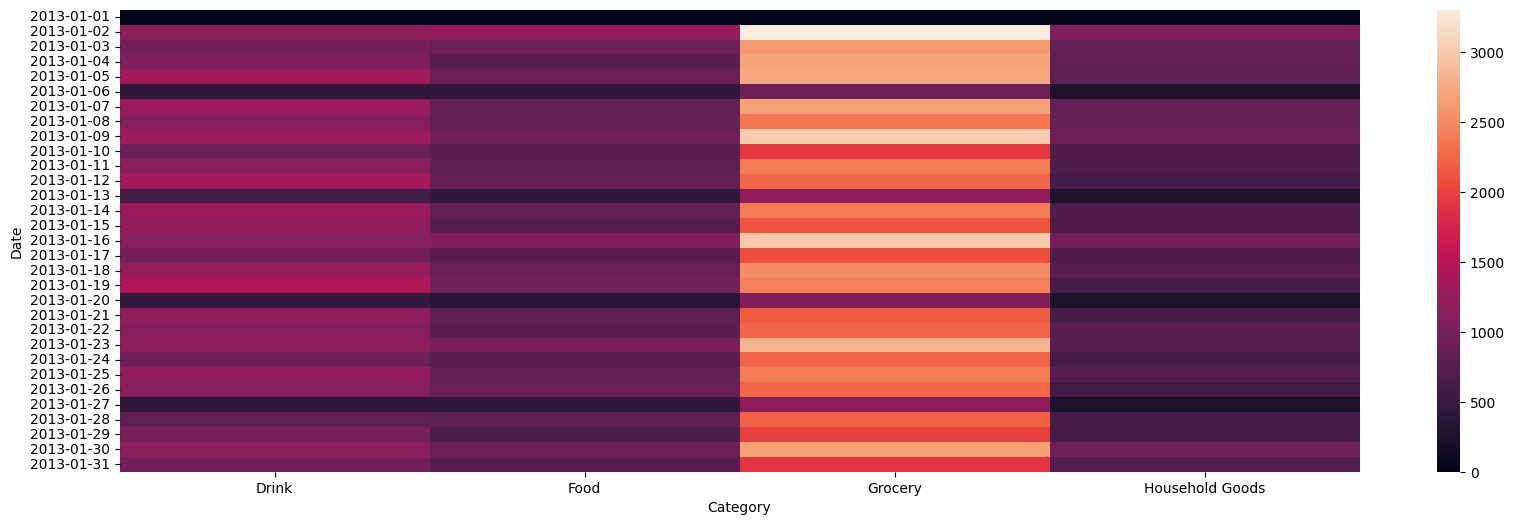

In [53]:
# sns.heatmap으로 시각화 할 수도 있습니다!

plt.figure(figsize = (20, 6))
sns.heatmap(temp3)
plt.show()

## **4.복습문제**

In [54]:
# 라이브러리 불러오기
import pandas as pd

In [55]:
sales = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_sales_simple.csv")
products = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_product_master.csv")
stores = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_store_master.csv")

1) sales에 금액(Amt) 변수를 추가하시오.
* Amt = Qty * Price

In [56]:
display(sales.head())
display(products.head())
display(stores.head())

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.0,3
1,5,2013-01-01,1,0.0,5
2,7,2013-01-01,1,0.0,7
3,8,2013-01-01,1,0.0,8
4,10,2013-01-01,1,0.0,10


,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
0,20,HG001,Gardening Tools,Household Goods,2,50
1,27,HH001,Home Appliances,Household Goods,2,150
2,16,HK001,Kitchen,Household Goods,2,23
3,15,HK002,Kitchen,Household Goods,2,41
4,32,GS001,Seafood,Grocery,3,34


,Store_ID,City,State,Store_Type
0,1,Saint Paul,Minnesota,4
1,2,Saint Paul,Minnesota,4
2,3,Saint Paul,Minnesota,4
3,4,Saint Paul,Minnesota,4
4,5,Oklahoma City,Oklahoma,4


In [58]:
m = pd.merge(sales, products)
m['Amt'] = m['Qty'] * m['Price']
m.head()

,Order_ID,Date,Store_ID,Qty,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price,Amt
0,3,2013-01-01,1,0.0,3,DB001,Beverage,Drink,2,8,0.0
1,36,2013-01-01,10,0.0,3,DB001,Beverage,Drink,2,8,0.0
2,69,2013-01-01,11,0.0,3,DB001,Beverage,Drink,2,8,0.0
3,102,2013-01-01,12,0.0,3,DB001,Beverage,Drink,2,8,0.0
4,135,2013-01-01,13,0.0,3,DB001,Beverage,Drink,2,8,0.0


2) City별 매출액

In [64]:
m2 = pd.merge(m,stores)
m2.groupby('City',as_index=False)['Amt'].sum()


,City,Amt
0,Albany,9.618918e+05
1,Annapolis,1.926923e+06
2,Asheville,5.699986e+05
3,Atlanta,3.374833e+06
4,Bloomington,1.154652e+06
5,Boston,9.879414e+05
6,Charlotte,1.229219e+06
7,Columbus,1.650586e+06
8,Harrisburg,1.345873e+06
9,Indianapolis,1.256235e+06


3) City별 카테고리별 매출액

In [67]:
m2.groupby(['City','Category'],as_index=False)['Amt'].sum()

,City,Category,Amt
0,Albany,Drink,2.367080e+05
1,Albany,Food,6.998561e+04
2,Albany,Grocery,3.676481e+05
3,Albany,Household Goods,2.875500e+05
4,Annapolis,Drink,3.507200e+05
...,...,...,...
79,Saint Paul,Household Goods,1.081224e+07
80,Wilmington,Drink,0.000000e+00
81,Wilmington,Food,0.000000e+00
82,Wilmington,Grocery,0.000000e+00


4) 매출액이 가장 높은 주(state) top 3

In [69]:
m3 = m2.groupby('State',as_index=False)['Amt'].sum()
m3.sort_values('Amt',ascending=False).head(3)

,State,Amt
6,Minnesota,4.733903e+07
8,North Carolina,1.133845e+07
0,Arizona,4.192750e+06


추가 문제

* 2013년 1월 세째 주 각 도시별 subCategory별 금액 비교
    1. 2013년 1월 세째 주
        * sales['Date']를 날짜 타입으로 변환
        * week 추가
        * sales에서 week가 3인 데이터 뽑기
    2. 각 도시별 subCategory별
        * 1의 결과에서...
        * stores와 inner merge
        * products와 inner merge
    3. 도시별 subCategory별 금액
        * Qty * Price로 Amt 추가
        * groupby
    4. 좀더 보기 좋게! pivot + heatmap
        * pivot
        * heatmap

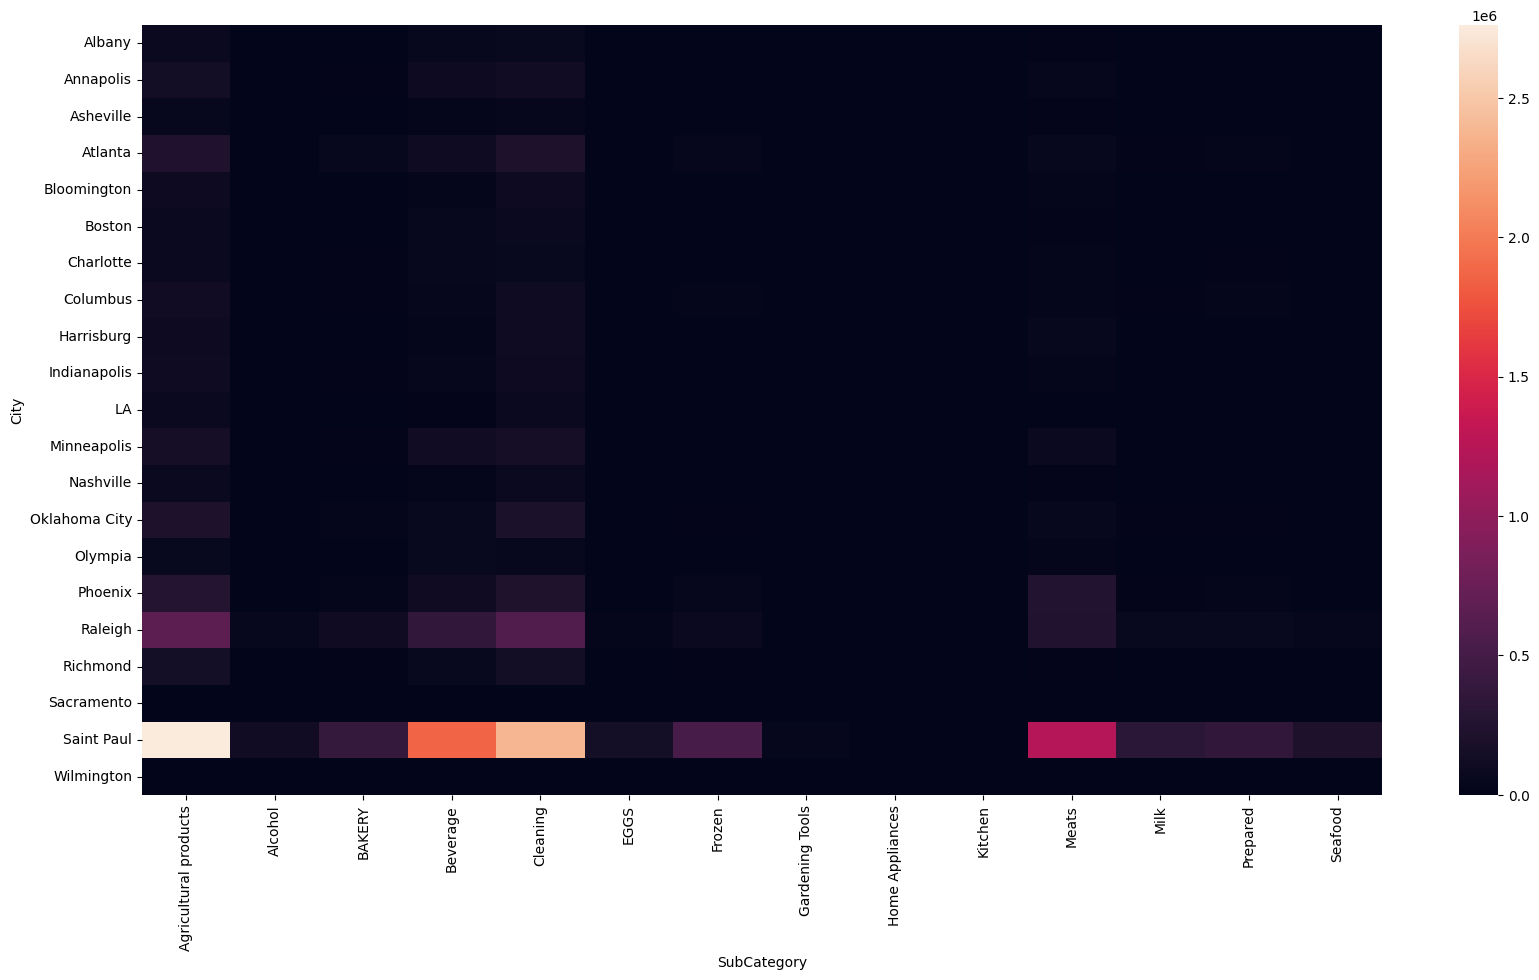

In [87]:
import pandas as pd

#1번
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Week'] = sales['Date'].dt.isocalendar().week
temp = sales.loc[sales['Week'] == 3, : ]

#2번
temp = pd.merge(temp,stores,how='inner')
temp = pd.merge(temp,products,how='inner')

#3번
temp['Amt'] = temp['Qty'] * temp['Price']
temp2 = temp.groupby(['City','SubCategory'],as_index=False)['Amt'].sum()

#4번
temp3 = temp2.pivot(index='City',columns = 'SubCategory', values = 'Amt')
plt.figure(figsize = (20,10))
sns.heatmap(temp3)
plt.show()
